# Build an image classification model

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from numpy import arange
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Load Data

In [4]:
((X_train,Y_train),(X_test, Y_test)) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
class_names=["plane","car","bird","cat","deer","dog","frog","horse","ship","truck"]

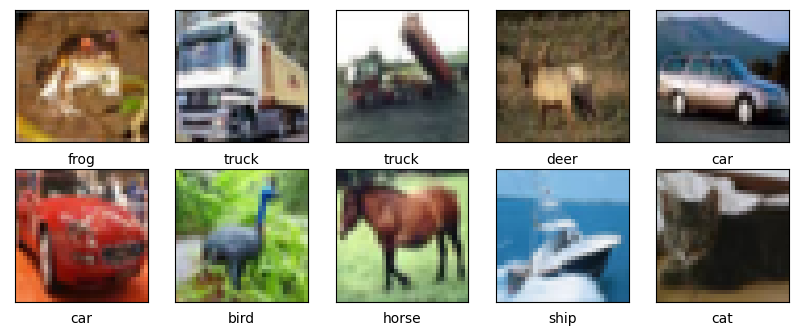

In [8]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])

# Build and Train Model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (2,2), activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(loss=SparseCategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          4128      
                                                                 
 flatten_1 (Flatten)         (None, 288)              

In [12]:
e = 5

In [13]:
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=e, batch_size=128)

Epoch 1/5
391/391 [==============================] - 21s 53ms/step - loss: 2.0876 - accuracy: 0.2217 - val_loss: 1.7447 - val_accuracy: 0.3648
Epoch 2/5
391/391 [==============================] - 21s 52ms/step - loss: 1.5846 - accuracy: 0.4271 - val_loss: 1.4641 - val_accuracy: 0.4700
Epoch 3/5
391/391 [==============================] - 21s 52ms/step - loss: 1.3964 - accuracy: 0.4989 - val_loss: 1.3467 - val_accuracy: 0.5125
Epoch 4/5
391/391 [==============================] - 21s 53ms/step - loss: 1.2967 - accuracy: 0.5353 - val_loss: 1.2336 - val_accuracy: 0.5620
Epoch 5/5
391/391 [==============================] - 21s 54ms/step - loss: 1.2074 - accuracy: 0.5730 - val_loss: 1.2509 - val_accuracy: 0.5547


In [14]:
pred = model.predict(X_test, batch_size=128)

79/79 [==============================] - 1s 14ms/step


In [15]:
pred.shape

(10000, 10)

In [16]:
Y_test.shape

(10000, 1)

In [17]:
Y_pred = []
Y_target = []
for i in range (0,1000):
    Y_pred.append(pd.Series(pred[i]).idxmax())
    Y_target.append(Y_test[i][0])

In [18]:
Y_pred

[3,
 8,
 8,
 0,
 6,
 3,
 1,
 6,
 5,
 1,
 0,
 9,
 7,
 7,
 9,
 8,
 5,
 3,
 9,
 6,
 7,
 2,
 0,
 9,
 4,
 2,
 4,
 0,
 9,
 9,
 7,
 7,
 0,
 5,
 9,
 9,
 7,
 9,
 9,
 5,
 9,
 6,
 3,
 6,
 9,
 9,
 3,
 7,
 7,
 6,
 9,
 8,
 6,
 9,
 8,
 8,
 5,
 7,
 5,
 3,
 7,
 3,
 9,
 9,
 6,
 6,
 1,
 0,
 3,
 9,
 0,
 6,
 8,
 8,
 9,
 2,
 0,
 8,
 5,
 8,
 8,
 8,
 1,
 7,
 2,
 7,
 2,
 8,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 2,
 0,
 7,
 7,
 7,
 6,
 1,
 1,
 2,
 6,
 9,
 5,
 7,
 0,
 2,
 2,
 9,
 9,
 0,
 3,
 5,
 7,
 8,
 7,
 1,
 2,
 8,
 8,
 8,
 5,
 2,
 2,
 4,
 1,
 9,
 9,
 9,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 5,
 8,
 4,
 3,
 6,
 5,
 5,
 0,
 1,
 9,
 8,
 0,
 5,
 4,
 9,
 3,
 4,
 2,
 1,
 9,
 6,
 8,
 4,
 8,
 6,
 7,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 9,
 8,
 7,
 2,
 2,
 7,
 8,
 6,
 3,
 3,
 8,
 2,
 8,
 0,
 1,
 7,
 4,
 9,
 2,
 2,
 8,
 3,
 8,
 8,
 7,
 1,
 2,
 0,
 7,
 7,
 9,
 5,
 1,
 3,
 9,
 8,
 0,
 0,
 9,
 8,
 7,
 7,
 7,
 9,
 5,
 7,
 9,
 3,
 0,
 3,
 9,
 7,
 1,
 3,
 8,
 8,
 0,
 2,
 9,
 3,
 5,
 1,
 1,
 8,
 9,
 0,
 6,
 7,
 8,
 2,
 1,


In [19]:
Y_target

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [20]:
print(classification_report(Y_target, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55       103
           1       0.81      0.66      0.73        89
           2       0.41      0.43      0.42       100
           3       0.39      0.30      0.34       103
           4       0.55      0.37      0.44        90
           5       0.41      0.34      0.37        86
           6       0.74      0.60      0.66       112
           7       0.56      0.73      0.63       102
           8       0.66      0.73      0.69       106
           9       0.54      0.82      0.65       109

    accuracy                           0.56      1000
   macro avg       0.56      0.55      0.55      1000
weighted avg       0.56      0.56      0.55      1000



# Plot Training Loss and Accuracy

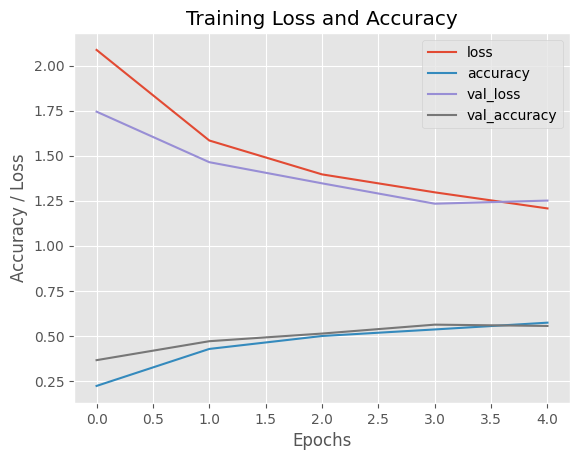

In [21]:
plt.style.use("ggplot")
plt.plot(arange(0,e), H.history["loss"], label="loss")
plt.plot(arange(0,e), H.history["accuracy"], label="accuracy")
plt.plot(arange(0,e), H.history["val_loss"], label="val_loss")
plt.plot(arange(0,e), H.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy / Loss")
plt.title("Training Loss and Accuracy")
plt.legend()